# Linear Regression and Logistic Regression

In this notebook, basic introduction and simple implementation of linear regression and logistic regression will be presented.

##  1 Linear Regression

Linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables.

### 1.1 Principles introduction

Run the following code to have a look at a simple example of linear regression

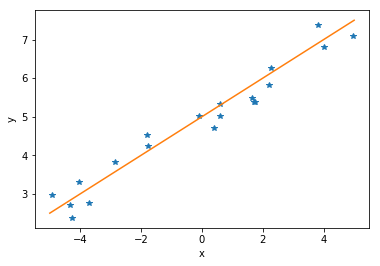

In [21]:
import matplotlib.pyplot as plt

# randomly create a data set for linear regression
x = [ 0.58500456, 4.01866865, -1.77212922, -4.02747114, 0.57881775, -4.93655307,
  2.28035163, -2.85694649,  2.19203313,  4.9515444, -1.81132774, 1.64503106,
  3.79573903, 1.74515277, -4.28061197, -3.70513525, 0.39447971, -0.09299847,
  1.69672987, -4.32747231]

y = [5.02299557, 6.81579751, 4.24993193, 3.31722371, 5.33379515, 2.96484545,
 6.24930042, 3.81948571, 5.81307105, 7.10387113, 4.51363387, 5.48957251,
 7.37023764, 5.37709773, 2.37626711, 2.76323507, 4.70645835, 5.00836228,
 5.3732451, 2.71635874]

plt.plot(x, y, '*')
plt.plot([-5,5], [2.5,7.5])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$x$ is variables and $\hat{y}$ is prediction.
The line means the linear model describing the relationship between $x$ and $\hat{y}$:
$$ \hat{y} = \theta_o x + \theta_1$$
In matrix form:  
$$ \hat{y} = \theta^{t} \ \textbf{x} $$
The objective in linear regression is to choose weights $a_0$ and $a_1$ which make the linear model fit the data points.
Cost Function helps us to figure out how good could the linear model fit the data point. Here we use mean square error (MSE) calculate the cost function.
$$ J(\theta) = \frac{1}{n} \sum_{i=1}^n (\hat{y}_{i} - y_{i})^2 $$

### 1.2 Boston housing dataset

At the next, we use a dataset, Boston housing dataset, to illustrate how to train and evaluate a linear regressio model.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# import dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

#### Data exploration

Then we could have a look at the Boston housing dataset.

In [104]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM: Per capita crime rate by town.  
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.  
INDUS: Proportion of non-retail business acres per town.  
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).  
NOX: Nitric oxide concentration (parts per 10 million).  
RM: Average number of rooms per dwelling.  
AGE: Proportion of owner-occupied units built prior to 1940.  
DIS: Weighted distances to five Boston employment centers.  
RAD: Index of accessibility to radial highways.  
TAX: Full-value property tax rate per 10,000 .  
PTRATIO: Pupil-teacher ratio by town.  
B: 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town.  
LSTAT: Percentage of lower status of the population.  
MEDV: Median value of owner-occupied homes in 1000 USD.  

Count the number of missing values in dataset Boston.

In [29]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

We will calculate and plot the mean and standard deviation of every feature in the dataset.

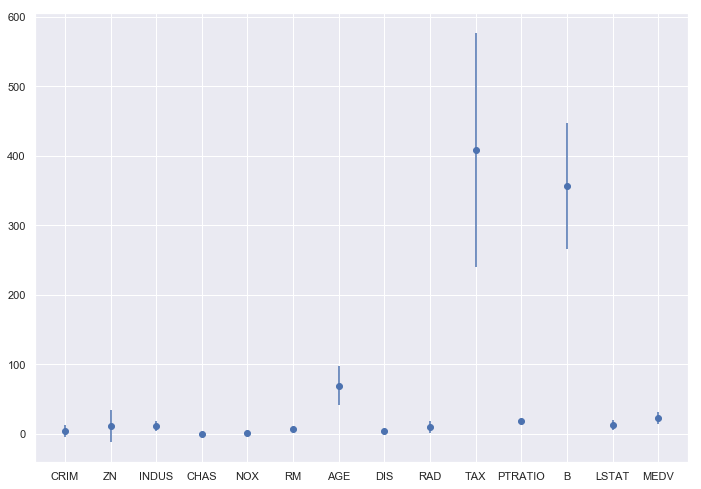

In [106]:
import numpy as np
import pandas as dp
import matplotlib.pyplot as plt

# initialize a data frame for statics with the same columns as boston dataset
feature_statics = dp.DataFrame(0.0, index=[0,1], columns=boston.columns)
for index, row in boston.iteritems():
    # calculate the mean value and standard deviation
    mean = np.mean(row)
    std = np.std(row)
    feature_statics.at[0, index] = mean
    feature_statics.at[1, index] = std

plt.errorbar(feature_statics.columns, feature_statics.iloc[0,:], yerr=feature_statics.iloc[1,:], fmt='o')
plt.show()


It is not difficult to find that ranges of different features varies a lot. One typical method to preprocess data is to scale the features into a identical range, such as [0, 1] or [-1, 1]. 

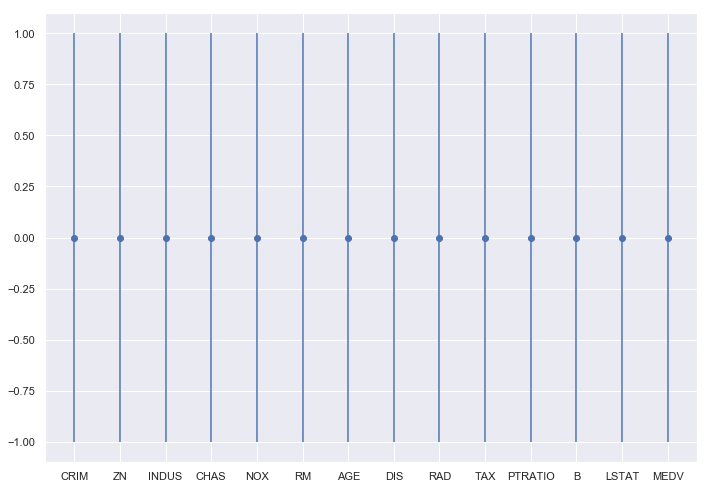

In [105]:
from sklearn import preprocessing
import pandas as pd

boston_scaled = pd.DataFrame(preprocessing.scale(boston, axis=0), columns = boston.columns)
feature_statics = dp.DataFrame(0.0, index=[0,1], columns=boston.columns)

for index, row in boston_scaled.iteritems():
    mean = np.mean(row)
    std = np.std(row)
    feature_statics.at[0, index] = mean
    feature_statics.at[1, index] = std

plt.errorbar(feature_statics.columns, feature_statics.iloc[0,:], yerr=feature_statics.iloc[1,:], fmt='o')
plt.show()

Plot the distribution of target variable $MEDV$.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


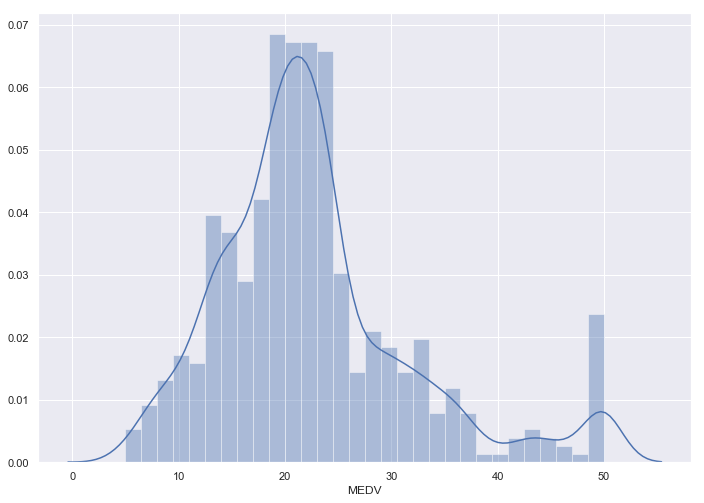

In [32]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

Create correlation matrix that measures the linear relationships between the variables.

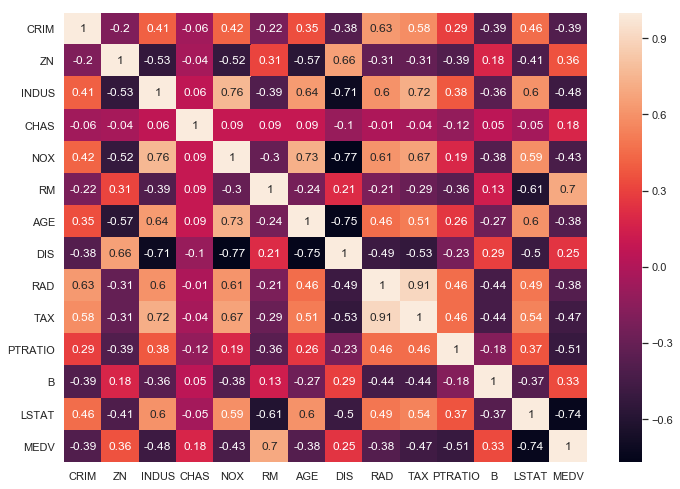

In [35]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

By defalut, the elements are calculated using Pearson correlation coefficient.  
$$\rho_{X, Y} = \frac{cov(X,Y)}{\sigma_{X} \sigma_{Y}} = \frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_{X} \sigma_{Y}}$$

The correlation between  $MEDV$ and $RM$ is 0.7. The correlation between $MEDV$ and $LSTAT$ is -0.74.  
We will select 6 features with higher correlation to explore further, including $INDUS$, $NOX$, $RM$, $TAX$, $PTRATIO$ and $LSTAT$.


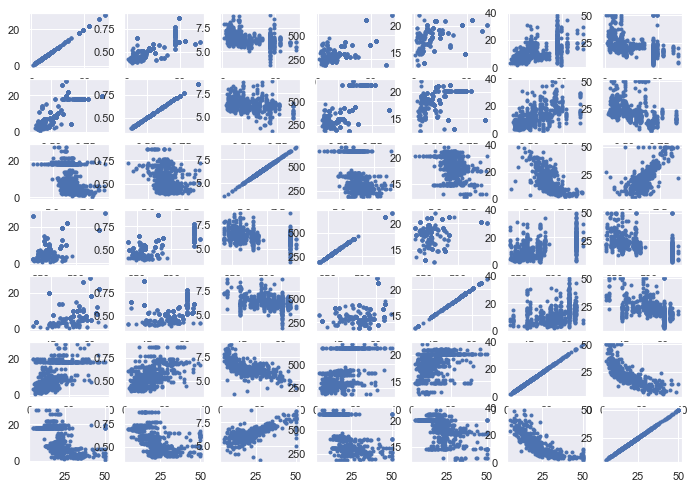

In [80]:
import matplotlib.pyplot as plt

features = ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

for i in range(7):
    for j in range(7):
        plt.subplot(7, 7, i*7+j+1)
        x1 = boston[features[i]]
        x2 = boston[features[j]]
        plt.scatter(x1, x2, marker='.')
        


In [46]:
from scipy.stats import pearsonr
target = boston['MEDV']

# calculate the pearson coefficient between different features
for index, row in boston.iteritems():
    feature = row
    pear_coefficient = pearsonr(feature, target)
    print('Pearson correlation coefficient between MEDV and ' + index + ':' + str(pear_coefficient))

Pearson correlation coefficient between MEDV and CRIM:(-0.38830460858681154, 1.1739870821945733e-19)
Pearson correlation coefficient between MEDV and ZN:(0.3604453424505432, 5.713584153081686e-17)
Pearson correlation coefficient between MEDV and INDUS:(-0.48372516002837285, 4.90025998175338e-31)
Pearson correlation coefficient between MEDV and CHAS:(0.17526017719029846, 7.390623170520815e-05)
Pearson correlation coefficient between MEDV and NOX:(-0.4273207723732827, 7.065041586254333e-24)
Pearson correlation coefficient between MEDV and RM:(0.6953599470715393, 2.487228871008295e-74)
Pearson correlation coefficient between MEDV and AGE:(-0.3769545650045962, 1.569982209188298e-18)
Pearson correlation coefficient between MEDV and DIS:(0.24992873408590394, 1.206611727337284e-08)
Pearson correlation coefficient between MEDV and RAD:(-0.3816262306397781, 5.465932569648567e-19)
Pearson correlation coefficient between MEDV and TAX:(-0.468535933567767, 5.637733627691498e-29)
Pearson correlation

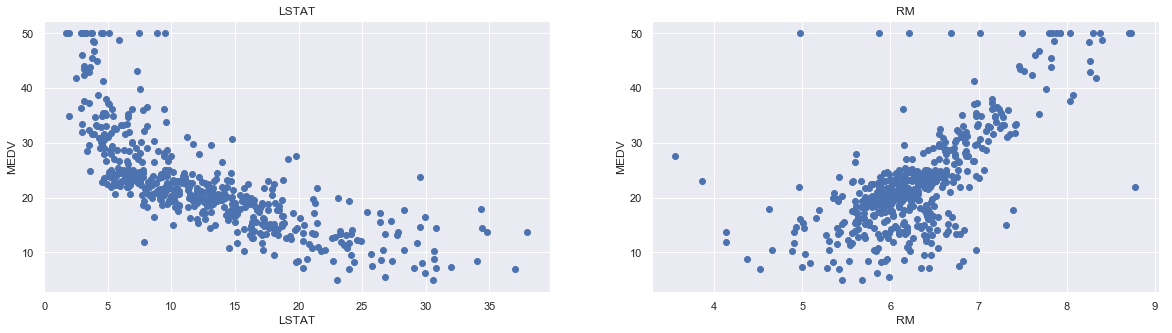

In [82]:
plt.figure(figsize=(20,5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

# plot the relationship between features and target
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

#### Prepare the data for training

Create trainging set and testing set.

In [93]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns=['LSTAT', 'RM'])
Y = boston['MEDV']

# split data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 2)
(102, 2)
(404,)
(102,)


#### Train the linear regression model

(10, 10)
(10, 10)
(10, 10)


<Figure size 1440x360 with 0 Axes>

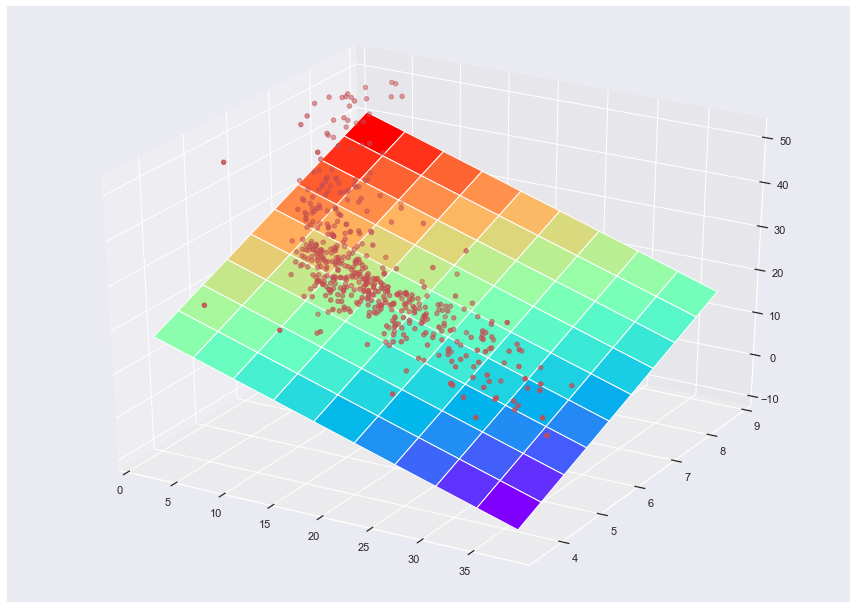

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

# initialize the linear regression classifier
lin_model = LinearRegression()

# use the training set to train the classifier
lin_model.fit(X_train, Y_train)

plt.figure(figsize=(20,5))

a = lin_model.intercept_
b = lin_model.coef_

fig = plt.figure()
ax = Axes3D(fig)
x1 = X['LSTAT']
x2 = X['RM']
Z = Y

x1_model = np.linspace(min(x1), max(x1), 10)
x2_model = np.linspace(min(x2), max(x2), 10)
[x1_model, x2_model] = np.meshgrid(x1_model, x2_model)

z_model = x1_model*b[0] + x2_model*b[1] + a

print(x1_model.shape)
print(x2_model.shape)
print(z_model.shape)

ax.plot_surface(x1_model, x2_model, z_model, rstride=1, cstride=1, cmap='rainbow')
ax.scatter(x1, x2, Z, c='r')

# for i, col in enumerate(features):
#     plt.subplot(1, len(features), i+1)
#     x = boston[col]
#     y = target
#     plt.scatter(x, y, marker='o')
#     plt.title(col)
#     plt.xlabel(col)
#     plt.ylabel('MEDV')
    
#     x_line = np.linspace(min(x), max(x), 10)
#     y_line = b[i] * x_line + a
    
#     print(b[i], a)
    
#     print(x_line.shape)
#     print(y_line.shape)
    
#     plt.plot(x_line, y_line)
    


#### Evaluate linear regression model

In [108]:
from sklearn.metrics import r2_score

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


Here, $RMSE$ is short for Root Mean Squard Error.  
$$RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

##  2 Logistic Regression

### 2.1 Principles Introduction

Linear Regression is used to determine the value of a continuous dependent variable and Logistic Regression is generally used for classification purposes. When the number of possible outcomes is only two it is called Binary Logistic Regression.

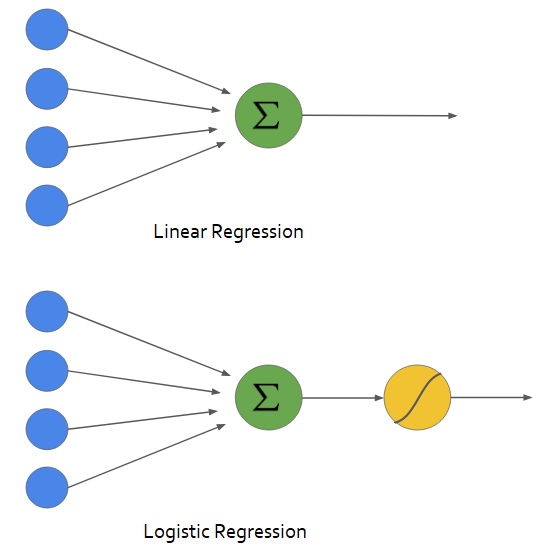

In [28]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/linear_regression.png", width=400, height=400)

As shown in above figure, the output of linear regression is a weighted sum of inputs. And in logistic regression, a activation function will be used to map the weighted sum into categorical value. In the next, sigmoid function will be introduced, which is a common choice of activation for logistic regression.  
$$\sigma(t) = \frac{1}{1+e^{-t}}$$


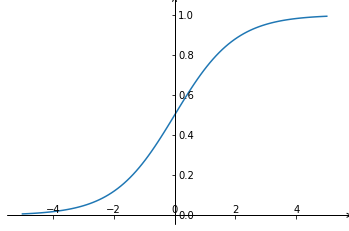

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_func(t):
    sigma = 1/(1+np.exp(-t))
    return sigma

x = np.linspace(-5, 5, 100)
x = np.expand_dims(x, axis=1)
y = sigmoid_func(x)

import mpl_toolkits.axisartist as axisartist

fig = plt.figure()
ax = axisartist.Subplot(fig, 111)
fig.add_axes(ax)
ax.axis[:].set_visible(False)
ax.axis["x"] = ax.new_floating_axis(0,0)
ax.axis["x"].set_axisline_style('->', size=1.0)

ax.axis["y"] = ax.new_floating_axis(1,0)
ax.axis["y"].set_axisline_style('->', size=1.0)

ax.axis["x"].set_axis_direction("top")
ax.axis["y"].set_axis_direction("right")

plt.plot(x,y)
plt.show()


In linear regression, the prediction is calculated using: $$ \hat{y} = \theta^{t} \ \textbf{x} $$
In logiscit regression: $$ \hat{y} = h_{\theta}(x) = \sigma(\theta^{t} \ \textbf{x}) = \frac{1}{1+e^{-\theta^{t} \ \textbf{x}}}$$
The cost function of logistic regression: $$ J(\theta) = \frac{1}{n} \sum_{i=1}^n ({y}_{i}log(\hat{y}_{i}) + (1 - {y}_{i}) log(1 - \hat{y}_{i})) $$

### 2.2 Titanic dataset

#### Basic Introduction of the dataset

The dataset includes data samples of personal information of passengers on Titanic. The task here is to predit that passengers got survived or not.

In [43]:
import pandas as pd

train_set = pd.read_csv('D:/Jupyter_space/titanic/train.csv')
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The columns include information of passengers:
    PassengerID-type should be integers  
    Survived: survived or not  
    Pclass: class of Travel of every passenger  
    Name: the name of the passenger  
    Sex: gender  
    Age: age of passengers  
    SibSp: No. of siblings/spouse aboard  
    Parch: No. of parent/child aboard  
    Ticket: Ticket number  
    Fare: what Prices they paid  
    Cabin: cabin number  
    Embarked: the port in which a passenger has embarked.  

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We could find the total number of data samples in this dataset is 891, but in some columns, such as Age and Cabin, there are some missing values.

#### Data visualization

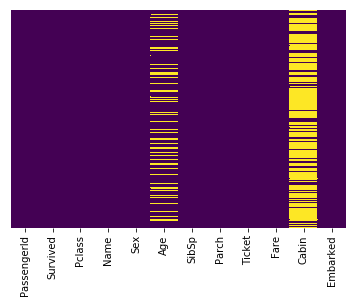

In [44]:
import seaborn as sns
sns.heatmap(train_set.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The following part will be used to explore gender disribution of both survived and unsurvived passengers. We could the majority of unsurvived passengers are male and more female passengers got survived

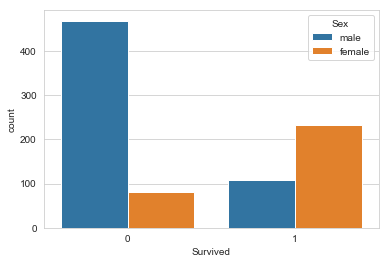

In [6]:
import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train_set)

In the next, we would like to visualize cabin class distribution.

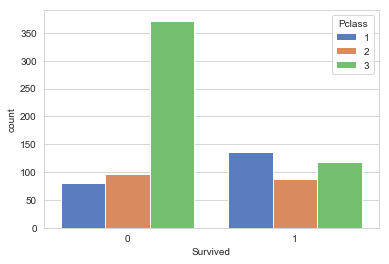

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train_set, palette='muted')

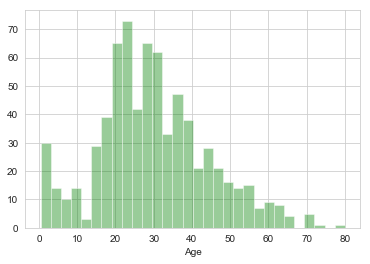

In [8]:
sns.distplot(train_set['Age'].dropna(), kde=False, bins=30, color='Green')

The age distribution for different passenger class.

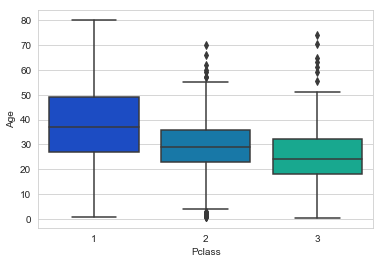

In [10]:
#boxplot with age on y-axis and Passenger class on x-axis.
sns.boxplot(x='Pclass',y='Age',data=train_set, palette='winter')

#### Data cleaning

The fuction in the next could add missing variable for age according to the age distribution for different passenger class.

In [46]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [47]:
train_set.drop('Cabin', axis=1,inplace=True)
train_set.dropna(inplace=True)
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


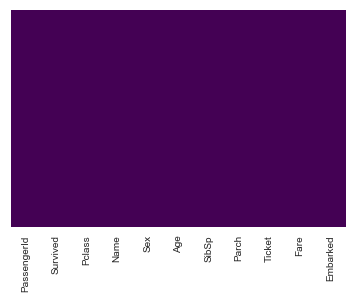

In [48]:
train_set['Age'] = train_set[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train_set.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Due to that there are too many missing values for 'Cabin', we would just delete this feature. Data samples with missing value for 'Embarked' will also be dropped.

We’ll need to convert categorical features to dummy variables.

In [49]:
sex = pd.get_dummies(train_set['Sex'],drop_first=True)
embark = pd.get_dummies(train_set['Embarked'],drop_first=True)
#drop the sex,embarked,name and tickets columns
train_set.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
#concatenate new sex and embark column to our train dataframe
train_set = pd.concat([train_set,sex,embark],axis=1)
#check the head of dataframe
train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [50]:
print(embark)

     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
6    0  1
7    0  1
8    0  1
9    0  0
10   0  1
11   0  1
12   0  1
13   0  1
14   0  1
15   0  1
16   1  0
18   0  1
20   0  1
21   0  1
22   1  0
23   0  1
24   0  1
25   0  1
27   0  1
30   0  0
33   0  1
34   0  0
35   0  1
37   0  1
38   0  1
..  .. ..
856  0  1
857  0  1
858  0  0
860  0  1
861  0  1
862  0  1
864  0  1
865  0  1
866  0  0
867  0  1
869  0  1
870  0  1
871  0  1
872  0  1
873  0  1
874  0  0
875  0  0
876  0  1
877  0  1
879  0  0
880  0  1
881  0  1
882  0  1
883  0  1
884  0  1
885  1  0
886  0  1
887  0  1
889  0  0
890  1  0

[712 rows x 2 columns]


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_set.drop('Survived',axis=1), 
           train_set['Survived'], test_size=0.2, random_state=101)

In [52]:
from sklearn.linear_model import LogisticRegression

#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

[[74 10]
 [19 40]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        84
           1       0.80      0.68      0.73        59

   micro avg       0.80      0.80      0.80       143
   macro avg       0.80      0.78      0.79       143
weighted avg       0.80      0.80      0.79       143



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The following figure illustrates concepts of ture postive, false positive, ture negative and false negative.

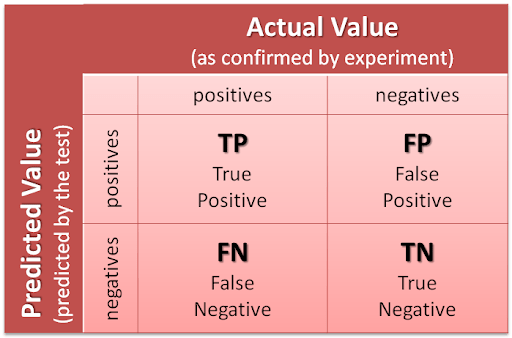

In [27]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/tp_np_tf_nf.png", width=400, height=400)

The precision could be calculated using:  
$$precision = \frac{TP}{TP+FP}$$
The recall could be calculated using:  
$$recall = \frac{TP}{TP+FN}$$